# COMPSCI369 - Assignment 1

### jesp268 - 7th March 2018

## Problem 0 - Working with Jupyter Notebooks

Answering questions:
- problem 0
- problem 1
- problem 2
- problem 3

It is easy to type maths in markdown, it is like Latex. We can write inline maths
like $f(x) = x^2$ or displayed maths such as <br>
$$ a = \begin{bmatrix}
            1 \\
            2 \\
            3 \\
        \end{bmatrix} $$
        
![Image of Jupiter](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Jupiter_and_its_shrunken_Great_Red_Spot.jpg/330px-Jupiter_and_its_shrunken_Great_Red_Spot.jpg)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-10, 10) 
plt.plot(x, x**2 - 5)
plt.show()

<Figure size 640x480 with 1 Axes>

## Problem 1 - Root Finding

### a) Newton's root finding algorithm equation

For $ f(x) = 20x^3 - 50x^2 + 3x + 20: $

$$ x_i = x_{i-1} - \frac{20x_{i-1}^3 - 50x_{i-1}^2 + 3x_{i-1} + 20}{60x_{i-1}^2 - 100x_{i-1} + 3} $$

For $ g(x) = e^{0.5x} - e^{0.6x} + 4: $

$$ x_i = x_{i-1} - \frac{e^{0.5x_{i-1}} - e^{0.6x_{i-1}} + 4}{0.5e^{0.5x_{i-1}} - 0.6e^{0.6x_{i-1}} + 4} $$

### b)
Using Newton's method for $f(x)$:

In [3]:
def f(x):
    return 20*x**3 - 50*x**2 + 3*x + 20
def f_deriv(x):
    return 60*x**2 - 100*x + 3

def newtonsMethod (fn, fn_deriv, start_position, epsilon):
    ## fn is the function in consideration
    x0 = start_position
    i = 0
    x1 = x0 - (fn(x0))/(fn_deriv(x0))

    print('{:<16s}{:<16s}{:<16s}'.format('Iteration','x_i','f(x_i)'))

    difference = abs(x1-x0)
    x_old = x0
    while (difference > epsilon):
        x_new = x_old - (fn(x_old))/(fn_deriv(x_old))

        print('{:<16g}{:<16g}{:<16g}'.format(i, x_new, fn(x_new)))

        difference = abs(x_new - x_old)
        x_old = x_new
        i += 1
    
    #return x_old

newtonsMethod(f, f_deriv, 0, 0.0001)

Iteration       x_i             f(x_i)          
0               -6.66667        -8148.15        
1               -4.22442        -2392.72        
2               -2.62521        -694.306        
3               -1.6027         -195.577        
4               -0.986499       -50.8194        
5               -0.668959       -10.3695        
6               -0.561777       -1.01087        
7               -0.548836       -0.0139752      
8               -0.548652       -2.8072e-06     
9               -0.548652       -1.1724e-13     


Using Newton's method for $g(x)$:

In [4]:
def g(x):
    return math.e**(0.5*x) - math.e**(0.6*x) + 4
def g_deriv(x):
    return 0.5*math.e**(0.5*x) - 0.6*math.e**(0.6*x)

newtonsMethod(g, g_deriv, 0, 0.0001)

Iteration       x_i             f(x_i)          
0               40              -2.6004e+10     
1               38.3385         -9.56366e+09    
2               36.678          -3.51711e+09    
3               35.0185         -1.29337e+09    
4               33.3605         -4.7558e+08     
5               31.704          -1.74859e+08    
6               30.0494         -6.42841e+07    
7               28.3971         -2.363e+07      
8               26.7475         -8.68468e+06    
9               25.1011         -3.19124e+06    
10              23.4587         -1.17236e+06    
11              21.8209         -430563         
12              20.1889         -158070         
13              18.5637         -58004.1        
14              16.947          -21271.5        
15              15.3409         -7794.19        
16              13.7481         -2852.4         
17              12.1726         -1041.81        
18              10.6211         -379.15         
19              9.10

### c)

Using the Bisection method for $f(x)$:

In [5]:
def bisectionMethod (fn, start_a, start_b, epsilon):
    ## fn is the function in consideration
    i = 0
    a = start_a
    b = start_b

    def sign(x):
        if x >= 0:
            return +1
        else:
            return -1

    print('{:<16s}{:<16s}{:<16s}'.format('Iteration','a','b','f(x)'))
    
    difference = abs(a-b)
    while (difference > epsilon):
        c = (a+b) / 2
            
        print('{:<16g}{:<16g}{:<16g}{:<16g}'.format(i, a, b, fn(c)))

        if sign(fn(a)) == sign(fn(c)):
            a = c
        else:
            b = c
        
        difference = abs(a-b)
        i += 1
    
    #return c
    
bisectionMethod(f, 0, 1, 0.0001)

Iteration       a               b               
0               0               1               11.5            
1               0.5             1               2.5625          
2               0.75            1               -2.25781        
3               0.75            0.875           0.157227        
4               0.8125          0.875           -1.0509         
5               0.8125          0.84375         -0.446762       
6               0.8125          0.828125        -0.14472        
7               0.8125          0.820312        0.00626874      
8               0.816406        0.820312        -0.0692222      
9               0.816406        0.818359        -0.0314758      
10              0.816406        0.817383        -0.0126033      
11              0.816406        0.816895        -0.00316723     
12              0.816406        0.81665         0.00155077      
13              0.816528        0.81665         -0.000808224    


However, locating the a root using Newton's method, starting from 0 gives a different root (above). Therefore, locating the same root starting from 0.3 gives:

In [6]:
newtonsMethod(f, f_deriv, 0.3, 0.0001)

Iteration       x_i             f(x_i)          
0               1.08426         -10.0346        
1               0.796642        0.769596        
2               0.816587        -0.000717073    
3               0.816568        -3.45981e-10    


In comparing the speed of convergence between the Bisection and Newton's method on f(x), the Bisection method identifies the root with almost 5 times more iterations than Newton's method does (14 vs 4 iterations respectively) accurate to 0.0001.

## Problem 2 - SVD based data compression

### a)


In [7]:
from matplotlib import pyplot
import re
import matplotlib.pyplot as plt
import numpy as np
import math


def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))


def display_pgm(array):
    plt.imshow(array, pyplot.cm.gray)
    plt.axis('off')
    plt.show()


image = read_pgm("A1PictureGray.pgm")
# Perform operations here
#display_pgm(image)
#for l in image:
  #  print(l)

A = UDVt
A:


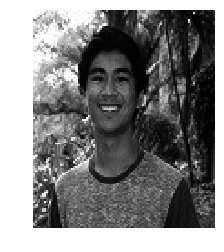

U:


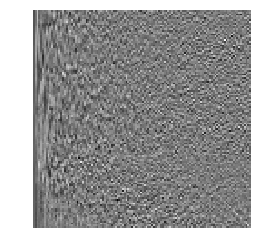

D:


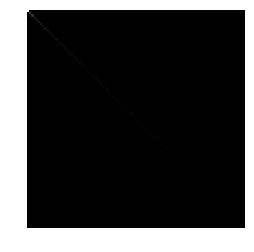

Vt:


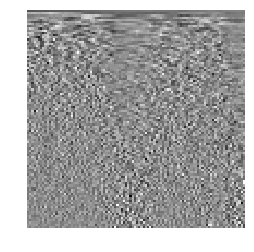

In [8]:
import numpy as np
import math
A = image
U, d, Vt = np.linalg.svd(A)
D = np.diag(d)

print('A = UDVt')
print("A:")
display_pgm(image)

print("U:")
display_pgm(U)

print("D:")
display_pgm(D)

print("Vt:")
display_pgm(Vt)

### b)

[[280.04200064 272.39585494 263.50243247 ...  29.89353739  37.87400184
   48.62923603]
 [275.10226654 267.59099321 258.85444414 ...  29.36623747  37.20593241
   47.77145222]
 [274.56243952 267.06590539 258.34649986 ...  29.30861275  37.13292404
   47.67771136]
 ...
 [111.36403069 108.32339535 104.78675667 ...  11.88773401  15.06131757
   19.33834111]
 [114.76447411 111.63099453 107.9863664  ...  12.25071986  15.52120715
   19.92882741]
 [106.58568563 103.67551616 100.29062557 ...  11.37766182  14.41507504
   18.50858247]]
original (p = 100)


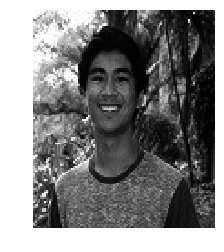

p = 1 singular values


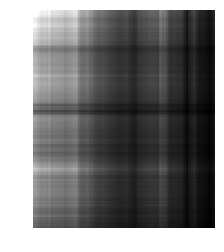

p = 2 singular values


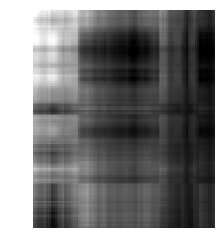

p = 3 singular values


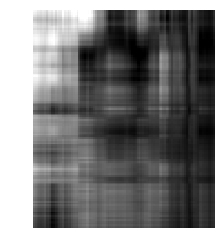

p = 4 singular values


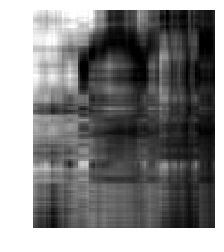

p = 5 singular values


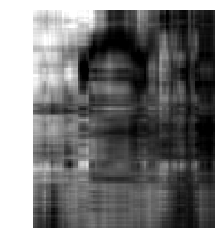

p = 10 singular values


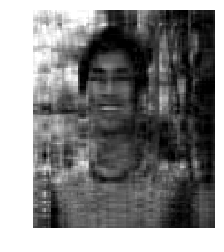

p = 20 singular values


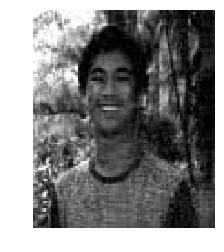

p = 30 singular values


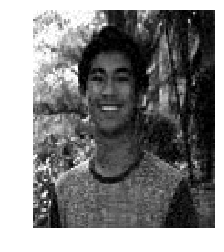

p = 40 singular values


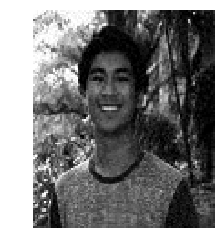

p = 90 singular values


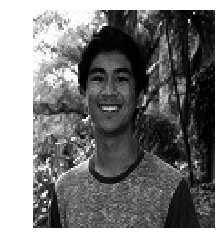

In [9]:
import numpy as np
import numpy.linalg

Ahat = []
m = U[:,0].size
n = d.size

print(numpy.matmul(
            numpy.matmul(
                U[:,:1],
                numpy.diag(d[:1])
            ),
            Vt[:1,:]
        )
     )

#print(m, n)

for i in range(1, n+1):
    #print(i)
    #print(U[:,:i] * np.diag(d[:i]) * Vt[:i,:])
    
    Ahat.append(
        numpy.matmul(
            numpy.matmul(
                U[:,:i],
                numpy.diag(d[:i])
            ),
            Vt[:i,:]
        )
    )
    
print("original (p = 100)")
display_pgm(image)
    #print('\n')
visualExamples = [1, 2, 3, 4, 5, 10, 20, 30, 40, 90]


for i, exampleValue in enumerate(visualExamples):
    #print(Ahat[value])
    for cell, cellVal in np.ndenumerate(Ahat[exampleValue-1]):
        if cellVal > 255:
            Ahat[exampleValue-1][cell[0]][cell[1]] = 255
        if cellVal < 0:
            Ahat[exampleValue-1][cell[0]][cell[1]] = 0


for i, exampleValue in enumerate(visualExamples):
    print('p = {} singular values'.format(exampleValue))
    display_pgm(Ahat[exampleValue-1])
    #pass

### c)

In [11]:
def getMatMaxError(M1, M2, decimal=1):
    """
    Returns the maximum value of the absolute errors between two matrices (M1 & M2)
    of the same shape to a specified number of decimal places.
    """
    return round(np.amax(abs(M1 - M2)),
                 decimal
                )

def getMatMeanError(M1, M2, decimal=1):
    """
    Returns the mean value of the absolute errors between two matrices (M1 & M2)
    of the same shape to a specified number of decimal places.
    """
    return round(np.mean(abs(M1 - M2)),
                 decimal
                )

def getCompression(A, Ahat, p, decimal=1):
    """
    Returns the compression value between matrix A and it's approximation matrix Ahat
    based on the number of singular values, p, used.
    
    p is the number of singular values used to approximate Ahat.
    """
    kp = Ahat.shape[0]*p + p + p*Ahat.shape[1]      # kp = number of real numbers used in the pth approximation
    return round(
                    (1 - (kp/A.size))*100,
                    decimal
                 )

print('{:<14s}|{:^7s}{:^7s}{:^7s}{:^7s}{:^7s}{:^7s}{:^7s}{:^7s}{:^7s}{:^7s}'
      .format('p', '1', '2', '3', '4', '5',
              '...10', '...20', '...30', '...40', '...90')
     )
print('{:85}'.format(85*'-'))

variableName = 'Max error'
outputString = f'{variableName:<14}|'
for i, exampleValue in enumerate(visualExamples):
    value = getMatMaxError(A, Ahat[exampleValue-1])
                  
    outputString += f'{value:>7}'
    
print(outputString)


variableName = 'Mean error'
outputString = f'{variableName:<14}|'
for i, exampleValue in enumerate(visualExamples):
    value = getMatMeanError(A, Ahat[exampleValue-1])
    outputString += f'{value:>7}'
    
print(outputString)

variableName = 'Compression, %'
outputString = f'{variableName:<14}|'
for i, exampleValue in enumerate(visualExamples):
           
    value = getCompression(A, Ahat[exampleValue-1], exampleValue)
            
    
    #print(np.amax(abs(A-Ahat[i])), i)
                  
    outputString += f'{value:>7}'
    
print(outputString)




p             |   1      2      3      4      5    ...10  ...20  ...30  ...40  ...90 
-------------------------------------------------------------------------------------
Max error     |  189.5  186.7  180.0  180.0  167.2  161.6  111.1   80.5   62.9    6.1
Mean error    |   35.6   29.0   25.0   23.3   21.7   17.1   12.9   10.0    7.6    0.7
Compression, %|   98.2   96.3   94.5   92.6   90.8   81.6   63.2   44.8   26.3  -65.8
